In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score


## Dataset Imports

In [3]:
# Import CSV
df= pd.read_csv ("Car_Insurance_Claim.csv")

In [4]:
# Review data frame content
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
# Information Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

## Data Cleaning and Prepaperation

In [6]:
# Check NULL value
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [7]:
# Check duplicate value
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
# Remove NULL value
df = df.dropna()

In [9]:
# Check NULL value again
df.isnull().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

## EDA

In [10]:
# Statistic Description
df.describe().round()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,8149.0,8149.0,8149.0,8149.0,8149.0,8149.0,8149.0,8149.0,8149.0,8149.0,8149.0
mean,501340.0,1.0,1.0,1.0,1.0,19726.0,11693.0,1.0,0.0,1.0,0.0
std,290858.0,0.0,0.0,1.0,0.0,18784.0,2822.0,2.0,1.0,2.0,0.0
min,101.0,0.0,0.0,0.0,0.0,10238.0,2000.0,0.0,0.0,0.0,0.0
25%,247706.0,0.0,0.0,0.0,0.0,10238.0,10000.0,0.0,0.0,0.0,0.0
50%,503269.0,1.0,1.0,1.0,1.0,10238.0,12000.0,0.0,0.0,0.0,0.0
75%,756207.0,1.0,1.0,1.0,1.0,32765.0,14000.0,2.0,0.0,2.0,1.0
max,999976.0,1.0,1.0,1.0,1.0,92101.0,22000.0,22.0,6.0,15.0,1.0


<Axes: title={'center': 'Outcome Count'}, xlabel='OUTCOME', ylabel='count'>

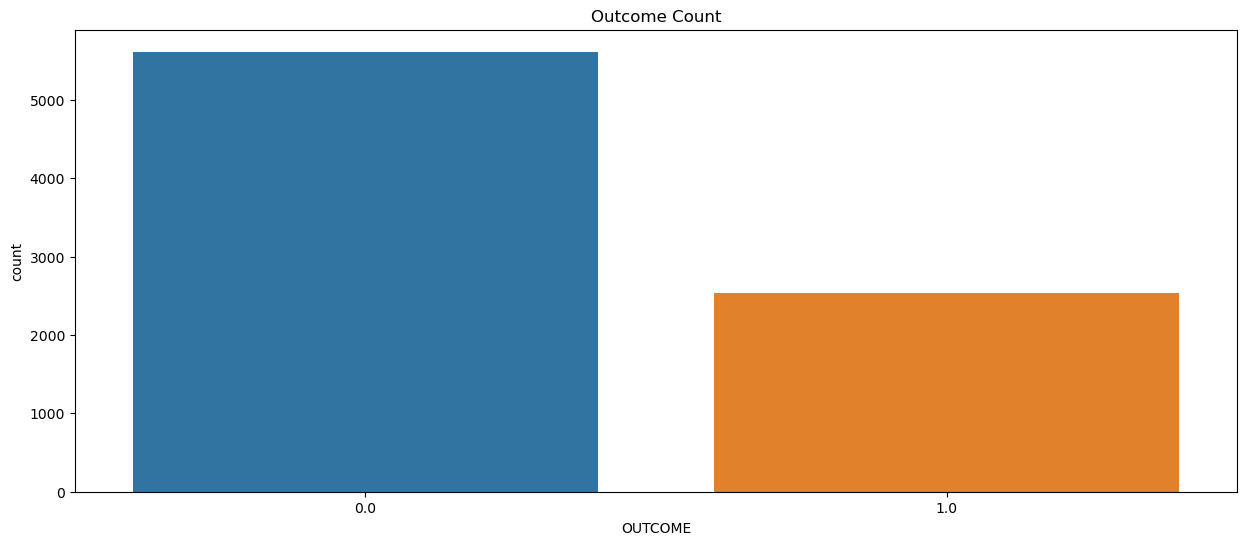

In [11]:
# Overview of the target variable
plt.figure(figsize=(15,6))
plt.title('Outcome Count')
sns.countplot(data=df, x ="OUTCOME")

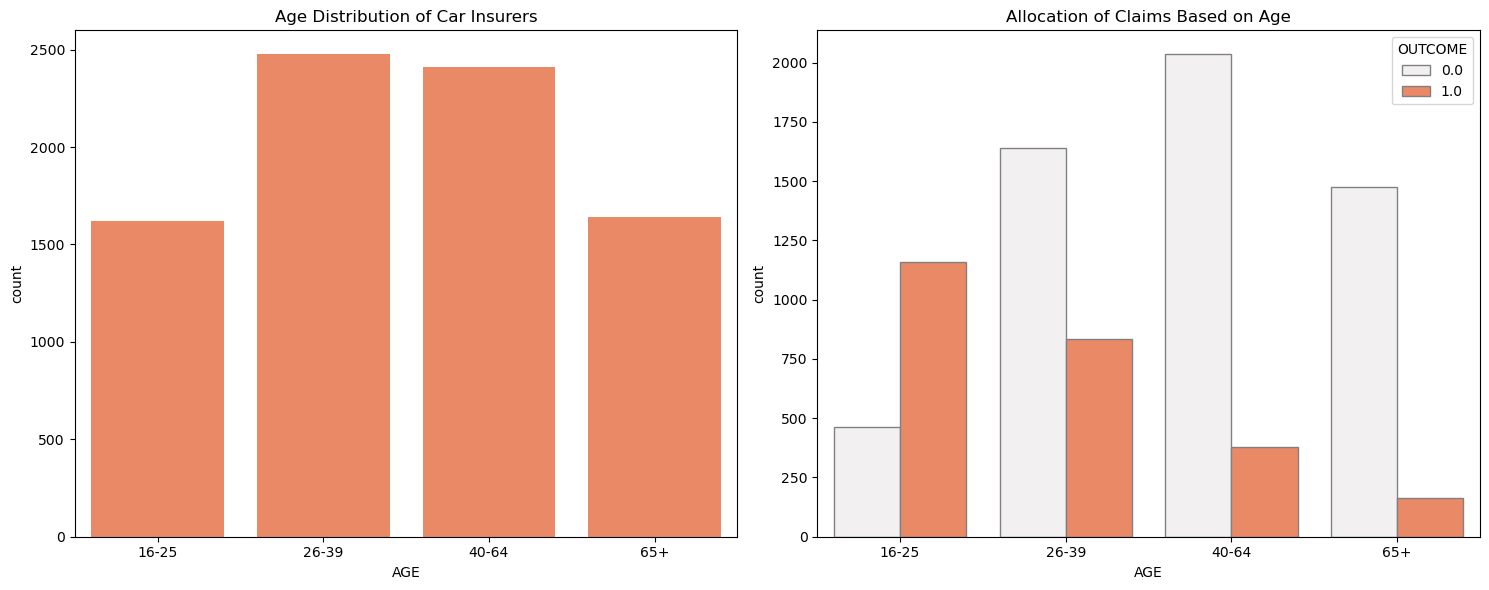

In [12]:
# a Visualization--Age

# Set the order of age
age_order = ["16-25", "26-39", "40-64", "65+"]
             
#Plot             
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.title('Age Distribution of Car Insurers')
sns.countplot(data=df, x ='AGE', order = age_order ,color = "coral")

plt.subplot(1, 2, 2)
plt.title('Allocation of Claims Based on Age')
sns.countplot(data=df, x ='AGE', order = age_order ,color = "coral", edgecolor='gray', hue ="OUTCOME")

plt.tight_layout()
plt.show()

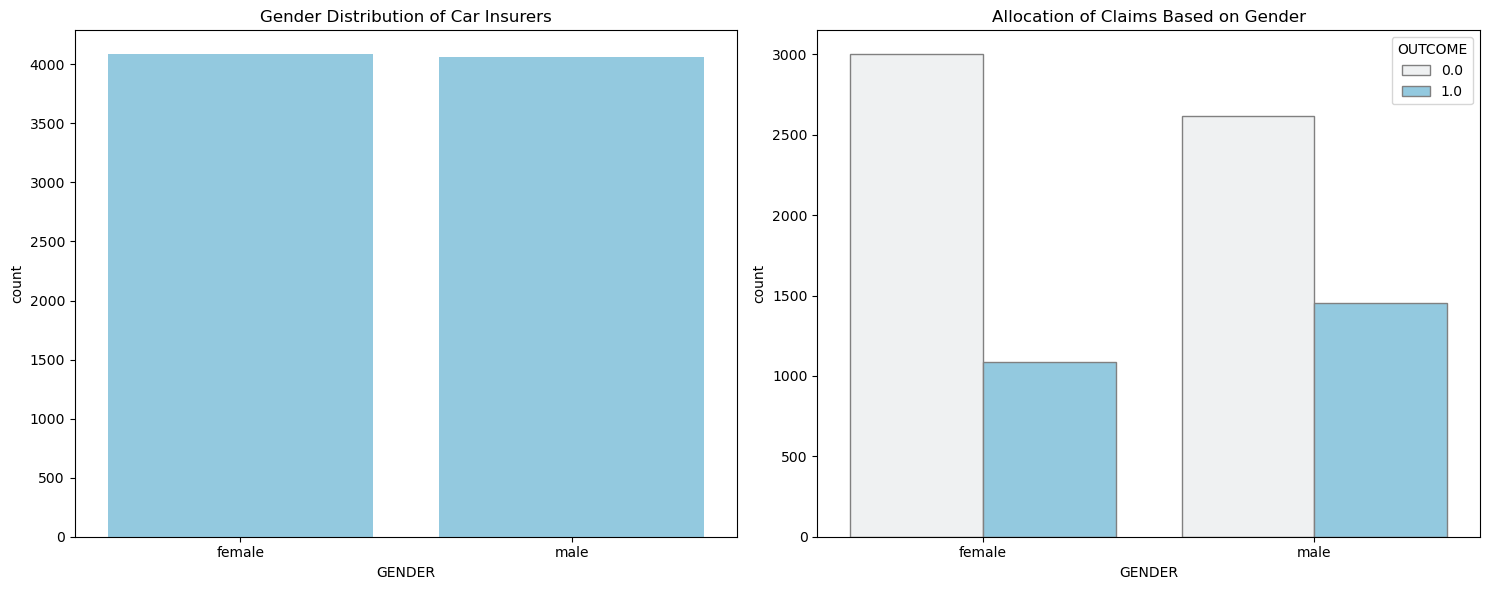

In [13]:
# Demographic Data Visualization--Gender
             
#Plot             
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.title('Gender Distribution of Car Insurers')
sns.countplot(data=df, x ='GENDER',color = "skyblue")

plt.subplot(1, 2, 2)
plt.title('Allocation of Claims Based on Gender')
sns.countplot(data=df, x ='GENDER',color = "skyblue",edgecolor='gray', hue ="OUTCOME")

plt.tight_layout()
plt.show()

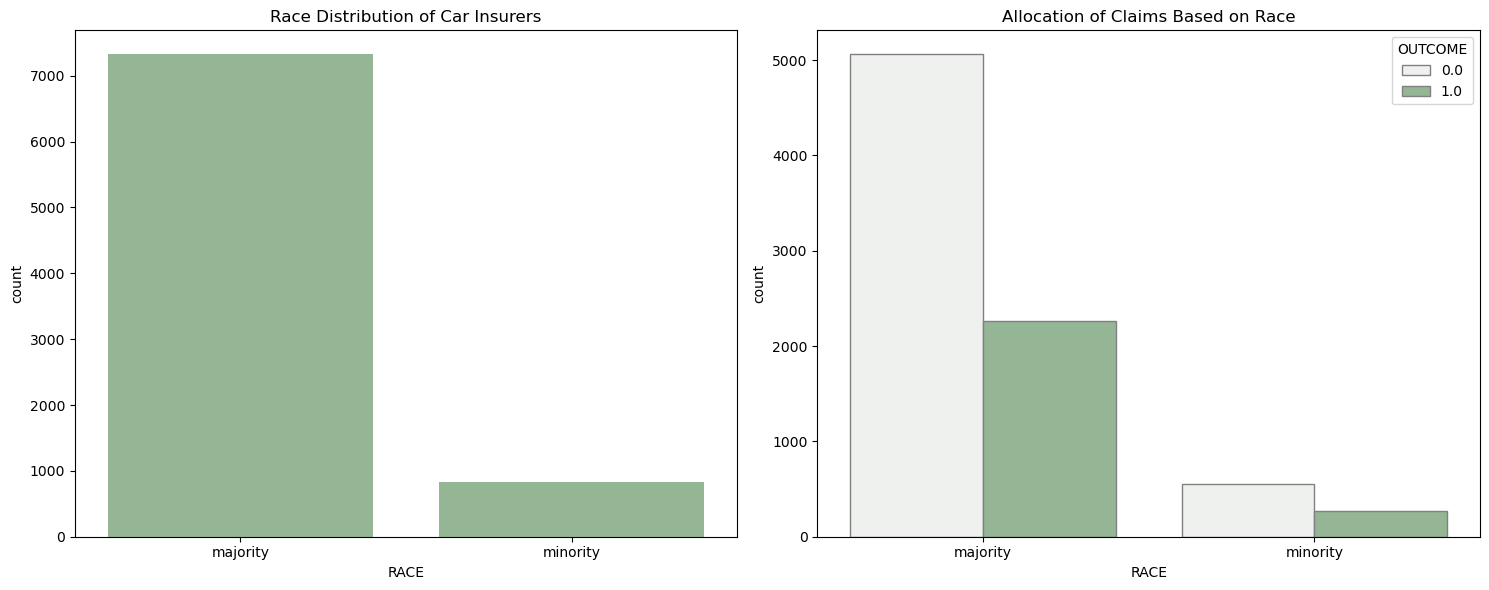

In [14]:
# Demographic Data Visualization--Race
             
#Plot             
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.title('Race Distribution of Car Insurers')
sns.countplot(data=df, x ='RACE', color = "darkseagreen")

plt.subplot(1, 2, 2)
plt.title('Allocation of Claims Based on Race')
sns.countplot(data=df, x ='RACE', color = "darkseagreen", edgecolor='gray', hue ="OUTCOME")

plt.tight_layout()
plt.show()

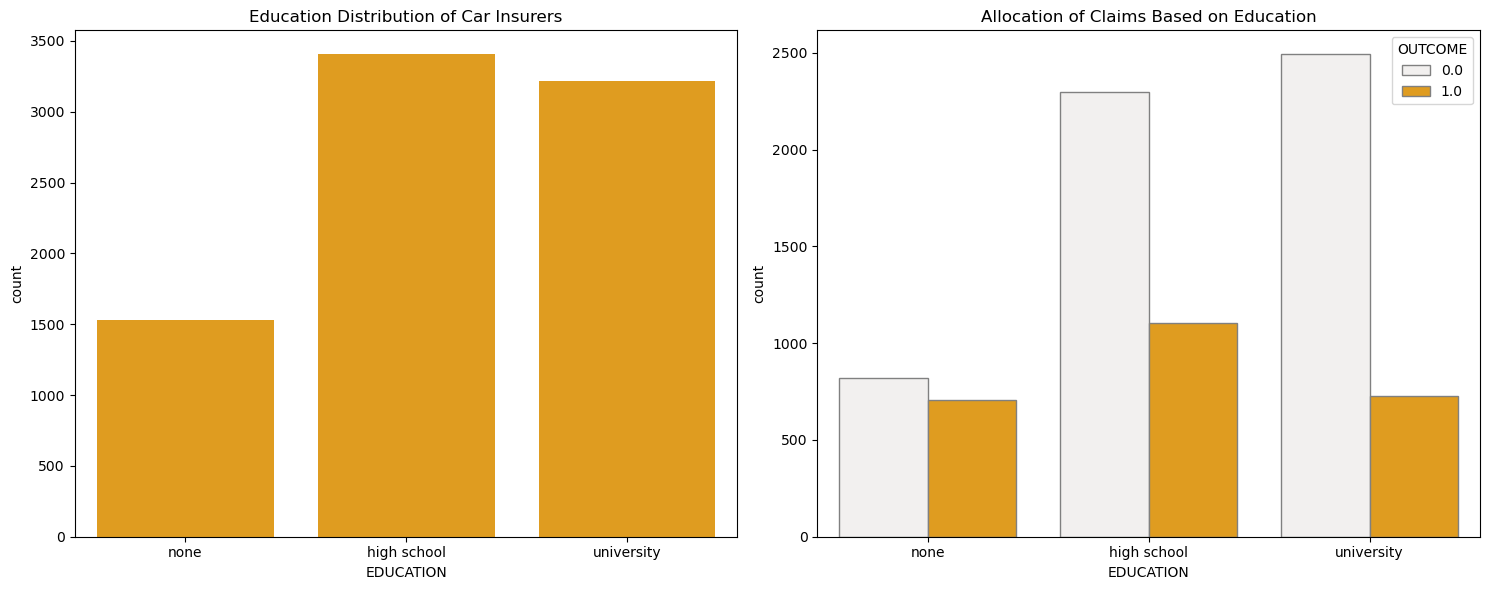

In [15]:
# Demographic Data Visualization--Education

# Set the order of education
education_order = ["none", "high school", "university"]

#PLot
plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
plt.title('Education Distribution of Car Insurers')
sns.countplot(data=df, x ='EDUCATION', order = education_order, color = "orange")

plt.subplot(1, 2, 2)
plt.title('Allocation of Claims Based on Education')
sns.countplot(data=df, x ='EDUCATION', order = education_order, color = "orange", edgecolor='gray', hue ="OUTCOME")

plt.tight_layout()
plt.show()

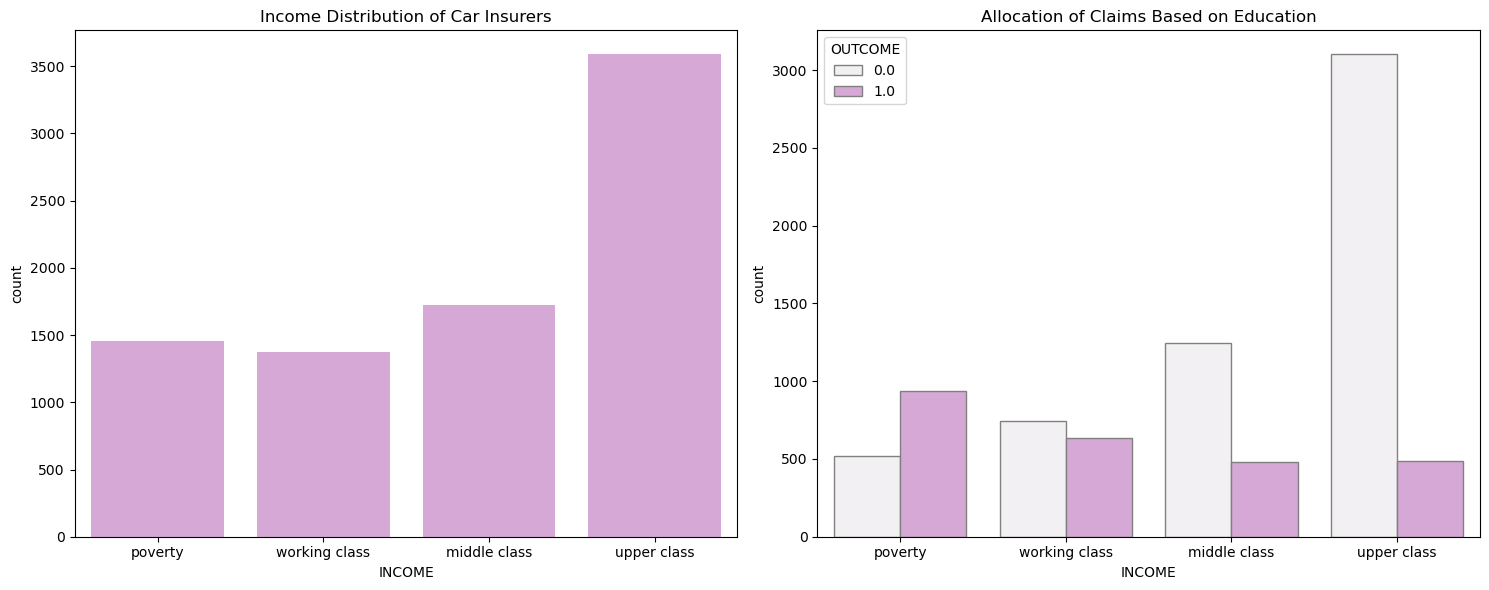

In [16]:
# Demographic Data Visualization--Income

# Set the order of income
income_order = ["poverty", "working class", "middle class", "upper class"]

#PLot
plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
plt.title('Income Distribution of Car Insurers')
sns.countplot(data=df, x ='INCOME', order = income_order, color = "plum")

plt.subplot(1, 2, 2)
plt.title('Allocation of Claims Based on Education')
sns.countplot(data=df, x ='INCOME', order = income_order, color = "plum", edgecolor='gray', hue ="OUTCOME")

plt.tight_layout()
plt.show()

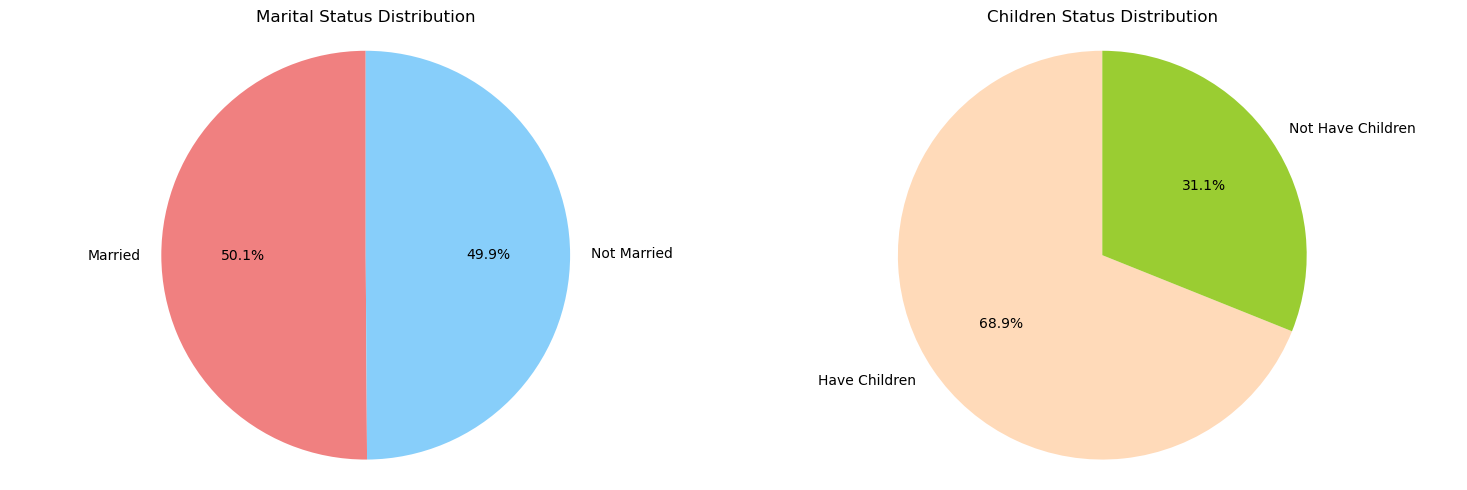

In [17]:
# Demographic Data Visualization--Married & Children

#Value Count
married_counts = df["MARRIED"].value_counts()
children_counts = df["CHILDREN"].value_counts()

# Colors
married_colors = ['lightcoral', 'lightskyblue'] 
colors = ['peachpuff', 'yellowgreen'] 

plt.figure(figsize=(15,5))

# Create pie chart1
plt.subplot(1, 2, 1)
plt.pie(married_counts, labels=['Married','Not Married'], autopct='%1.1f%%', startangle=90, colors = married_colors)
plt.title('Marital Status Distribution')
plt.axis('equal')  

# Create pie chart2
plt.subplot(1, 2, 2)
plt.pie(children_counts, labels=['Have Children','Not Have Children'], autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Children Status Distribution')
plt.axis('equal')  

plt.tight_layout()
plt.show()

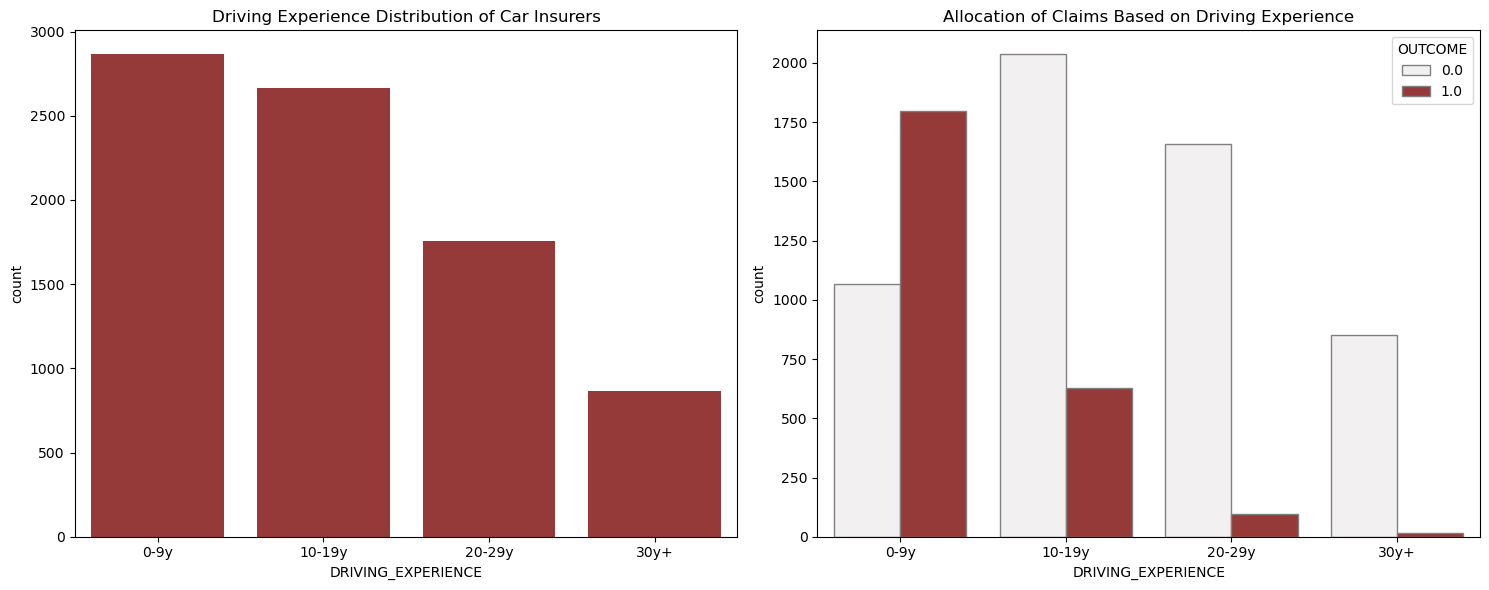

In [18]:
# Driving Related Data Visualization-- Driving Experience

#Plot
plt.figure(figsize = (15,6))

plt.subplot(1, 2, 1)
plt.title('Driving Experience Distribution of Car Insurers')
sns.countplot(data=df, x ='DRIVING_EXPERIENCE', color = "brown")

plt.subplot(1, 2, 2)
plt.title('Allocation of Claims Based on Driving Experience')
sns.countplot(data=df, x="DRIVING_EXPERIENCE", color = "brown", edgecolor='gray', hue ="OUTCOME")

plt.tight_layout()
plt.show()

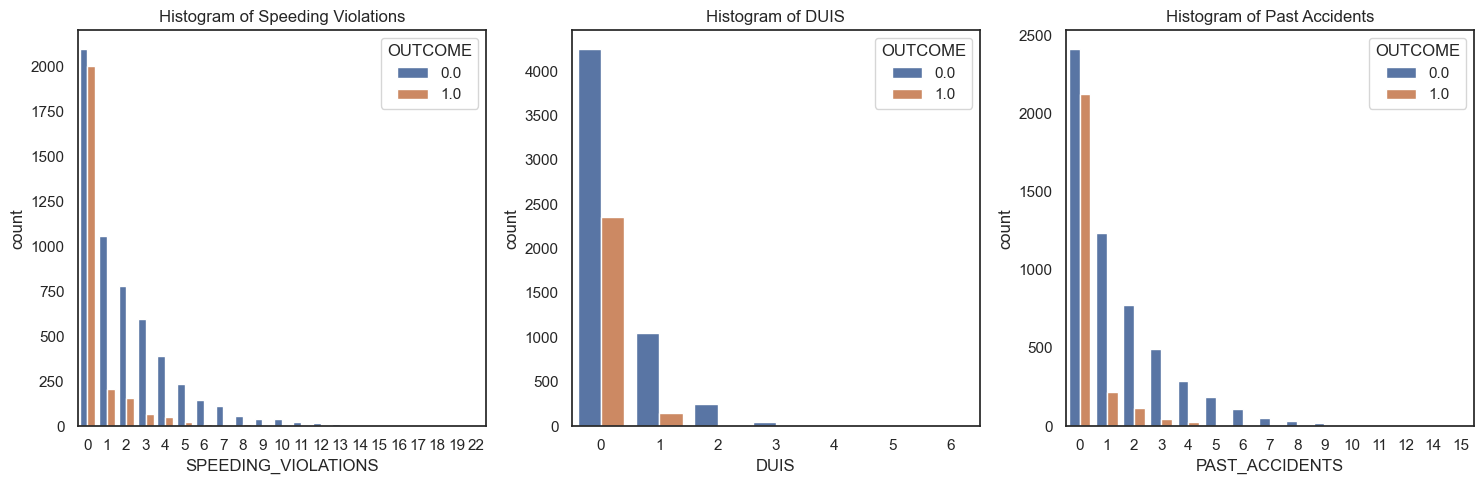

In [67]:
# Driving Related Data Visualization-- SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS

#Plot
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.xlabel('Speeding Violations')
plt.ylabel('Counts')
plt.title('Histogram of Speeding Violations')
sns.countplot(data=df, x='SPEEDING_VIOLATIONS', hue='OUTCOME')

plt.subplot(1,3,2)
plt.xlabel('DUIS')
plt.ylabel('Counts')
plt.title('Histogram of DUIS')
sns.countplot(data=df, x='DUIS', hue='OUTCOME')

plt.subplot(1,3,3)
plt.xlabel('Past Accidents')
plt.ylabel('Counts')
plt.title('Histogram of Past Accidents')
sns.countplot(data=df, x='PAST_ACCIDENTS', hue='OUTCOME')

plt.tight_layout()
plt.show()

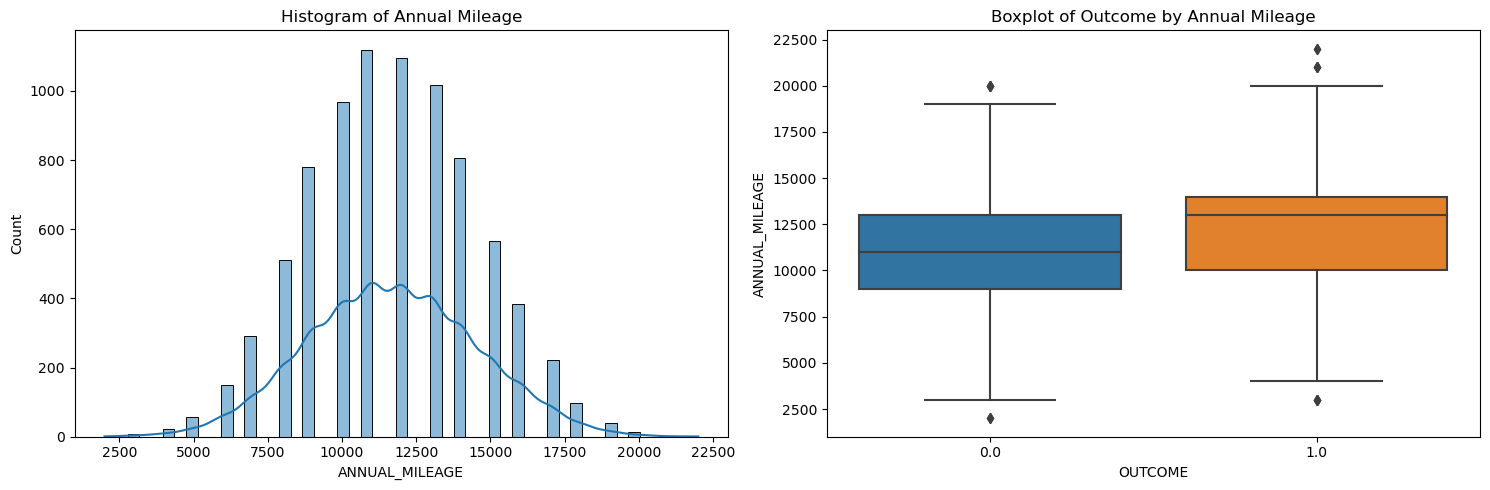

In [20]:
# Driving Related Data Visualization-- Annual Mileage

#PLot
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
plt.title('Histogram of Annual Mileage')
sns.histplot(data=df, x='ANNUAL_MILEAGE', kde=True)

plt.subplot(1, 2, 2)
plt.xlabel('Outcome')
plt.ylabel('Annual Mileage')
plt.title('Boxplot of Outcome by Annual Mileage')
sns.boxplot(data=df, x='OUTCOME', y='ANNUAL_MILEAGE')

plt.tight_layout()
plt.show()

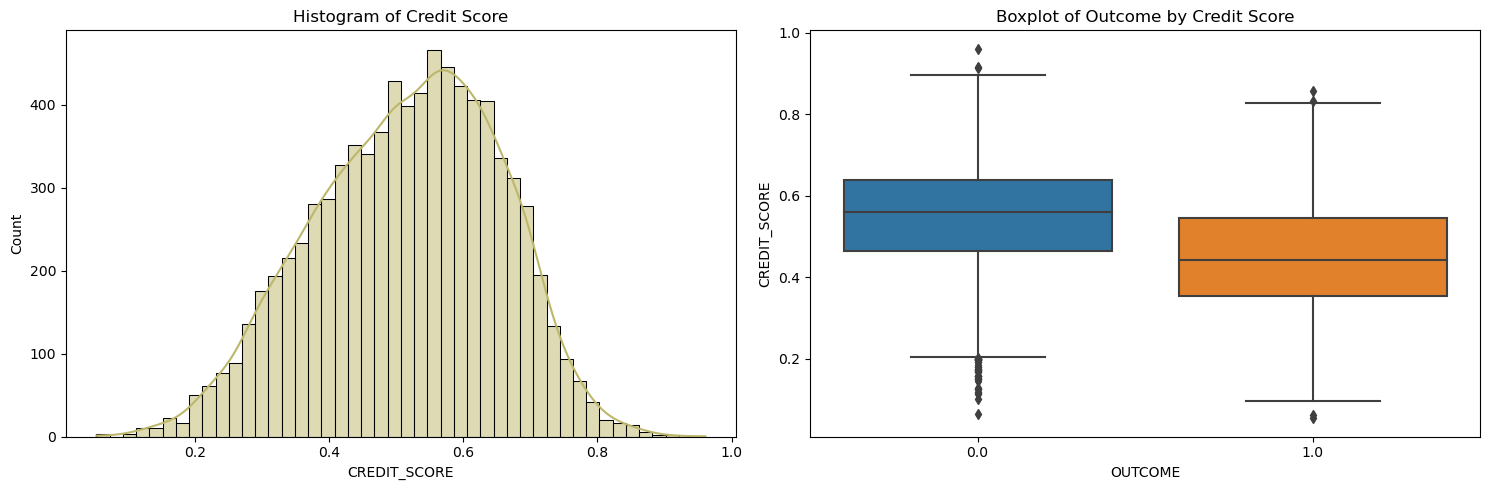

In [21]:
# Other Data Visualization-- Credit Score

#PLot
plt.figure(figsize = (15,5))

plt.subplot(1, 2, 1)
plt.title('Histogram of Credit Score')
sns.histplot(data=df, x='CREDIT_SCORE',color = "darkkhaki", kde=True)

plt.subplot(1, 2, 2)
plt.xlabel('Outcome')
plt.ylabel('Credit Score')
plt.title('Boxplot of Outcome by Credit Score')
sns.boxplot(data=df, x='OUTCOME', y='CREDIT_SCORE')

plt.tight_layout()
plt.show()

/var/folders/84/0d5lkhm96x566lwrn41glvcw0000gn/T/ipykernel_79105/766437417.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.drop('OUTCOME', axis=1).corrwith(df.OUTCOME).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with OUTCOME",color="cornflowerblue");


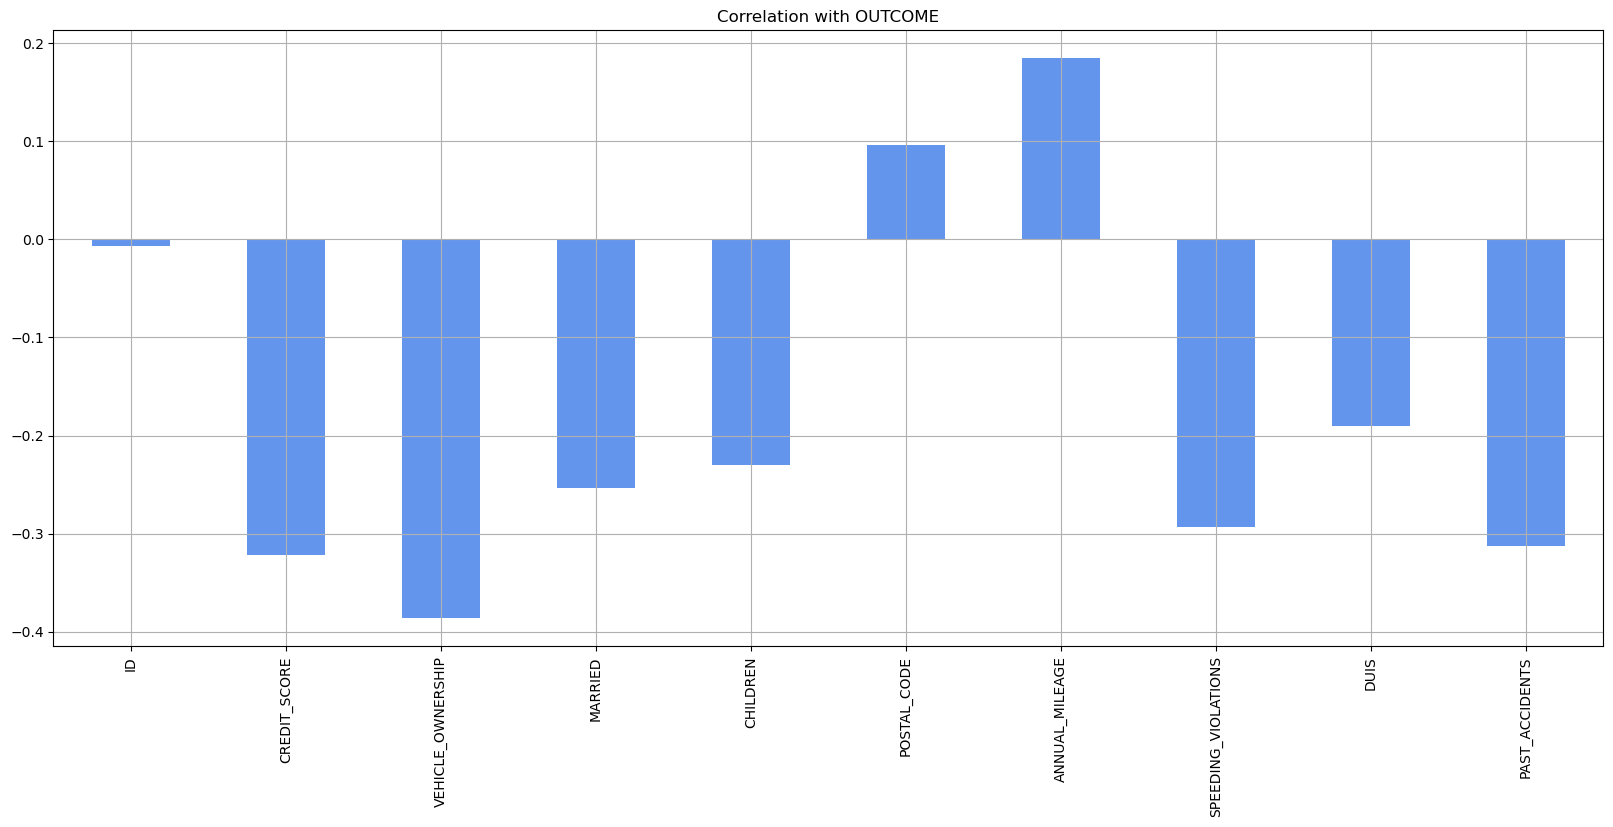

In [22]:
# Correlation Chart
df.drop('OUTCOME', axis=1).corrwith(df.OUTCOME).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with OUTCOME",color="cornflowerblue");


## Modelling

In [23]:
# Identify Independent variables (X) and Dependent variable (y)
X = df.drop(['OUTCOME','ID'], axis=1)
y = df['OUTCOME']
X = pd.get_dummies(X, drop_first=True)

In [25]:
# Split dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [26]:
# Scale the independent variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Model

In [28]:
# Create a Logistic model
lr = LogisticRegression(max_iter=1000)

In [29]:
# Test best hyperparameters for Logistic model.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Penalty (l1 or l2 regularization)
    'solver': ['liblinear']                # Algorithm to use in the optimization problem
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [30]:
# Update a Logistic model
lr = LogisticRegression(max_iter=1000, C=0.1, penalty = 'l1', solver = 'liblinear', class_weight='balanced')

In [31]:
# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
lr_y_pred = lr.predict(X_test)
lr_y_prob = lr.predict_proba(X_test)[:,1]
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [32]:
# Evaluate by Metrics
lr_ac = accuracy_score(y_test, lr_y_pred)
lr_rocauc= roc_auc_score(y_test, lr_y_prob)

In [33]:
# Evaluate by Metrics
print(classification_report(y_test, lr_y_pred))
print(f'ROC AUC score: {lr_ac}')
print('Accuracy Score: ',lr_rocauc)

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      1688
         1.0       0.66      0.86      0.75       757

    accuracy                           0.82      2445
   macro avg       0.79      0.83      0.80      2445
weighted avg       0.84      0.82      0.83      2445

ROC AUC score: 0.820040899795501
Accuracy Score:  0.9027363877115329


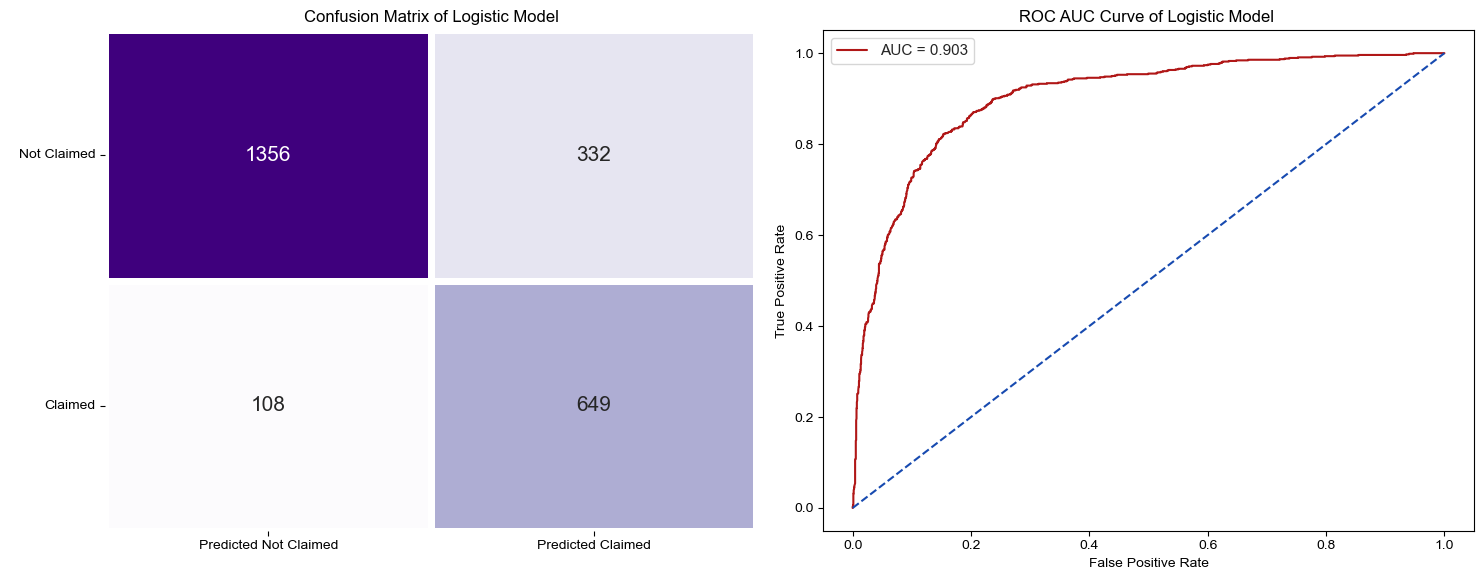

In [34]:
plt.figure(figsize = (15, 6))

# Visualizing Confusion Matrix
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix of Logistic Model')
sns.heatmap(lr_cm, cmap = 'Purples', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not Claimed', 'Claimed'], xticklabels = ['Predicted Not Claimed', 'Predicted Claimed'])
plt.yticks(rotation = 0)

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, lr_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.subplot(1, 2, 2)
sns.set_theme(style = 'white')
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve of Logistic Model ')
plt.legend()

plt.tight_layout()
plt.show()

### Decision Tree Model

In [35]:
# Create a Decision Tree Classification model
dtc = DecisionTreeClassifier()

In [36]:
# Test best hyperparameters for Decision Tree Classification model.
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [36]:
# Update the Decision Tree Classification model
dtc = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 4, min_samples_split= 10, class_weight='balanced')

In [37]:
# Fit the model on the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
dtc_y_pred = dtc.predict(X_test)
dtc_y_prob = dtc.predict_proba(X_test)[:,1]
dtc_cm = confusion_matrix(y_test, dtc_y_pred)

In [38]:
# Evaluate by Metrics
dtc_ac = accuracy_score(y_test, dtc_y_pred)
dtc_rocauc= roc_auc_score(y_test, dtc_y_prob)

In [39]:
# Evaluate by Metrics
print(classification_report(y_test, dtc_y_pred))
print(f'ROC AUC score: {dtc_ac}')
print('Accuracy Score: ',dtc_rocauc)

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      1688
         1.0       0.66      0.87      0.75       757

    accuracy                           0.82      2445
   macro avg       0.79      0.83      0.80      2445
weighted avg       0.85      0.82      0.83      2445

ROC AUC score: 0.8196319018404908
Accuracy Score:  0.8883462094699079


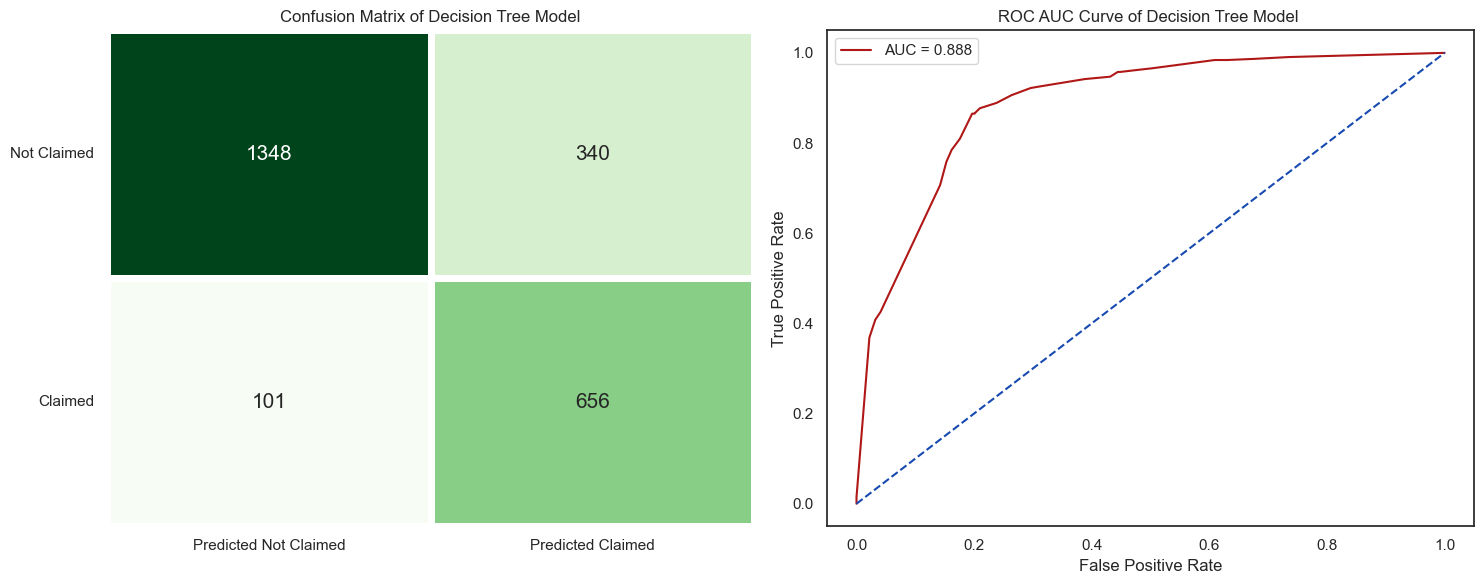

In [40]:
plt.figure(figsize = (15, 6))

# Visualizing Confusion Matrix
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix of Decision Tree Model')
sns.heatmap(dtc_cm, cmap = 'Greens', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not Claimed', 'Claimed'], xticklabels = ['Predicted Not Claimed', 'Predicted Claimed'])
plt.yticks(rotation = 0)

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dtc_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.subplot(1, 2, 2)
sns.set_theme(style = 'white')
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve of Decision Tree Model ')
plt.legend()

plt.tight_layout()
plt.show()

### Random Forest Model

In [41]:
# Create a Random Forest Classifier model
rfc = RandomForestClassifier()

In [43]:
# Test best hyperparameters for Random Forest Classifier model.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [61]:
# Update the Random Forest Classifier model
rfc = RandomForestClassifier(max_depth= None, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 300, class_weight='balanced')

In [62]:
# Fit the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
rfc_y_pred = rfc.predict(X_test)
rfc_y_prob = rfc.predict_proba(X_test)[:,1]
rfc_cm = confusion_matrix(y_test, rfc_y_pred)

In [63]:
# Evaluate by Metrics
rfc_ac = accuracy_score(y_test, rfc_y_pred)
rfc_rocauc= roc_auc_score(y_test, rfc_y_prob)

In [64]:
# Evaluate by Metrics
print(classification_report(y_test, rfc_y_pred))
print(f'ROC AUC score: {rfc_ac}')
print('Accuracy Score: ',rfc_rocauc)

              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88      1688
         1.0       0.72      0.78      0.75       757

    accuracy                           0.84      2445
   macro avg       0.81      0.82      0.82      2445
weighted avg       0.84      0.84      0.84      2445

ROC AUC score: 0.8396728016359918
Accuracy Score:  0.9080556199014568


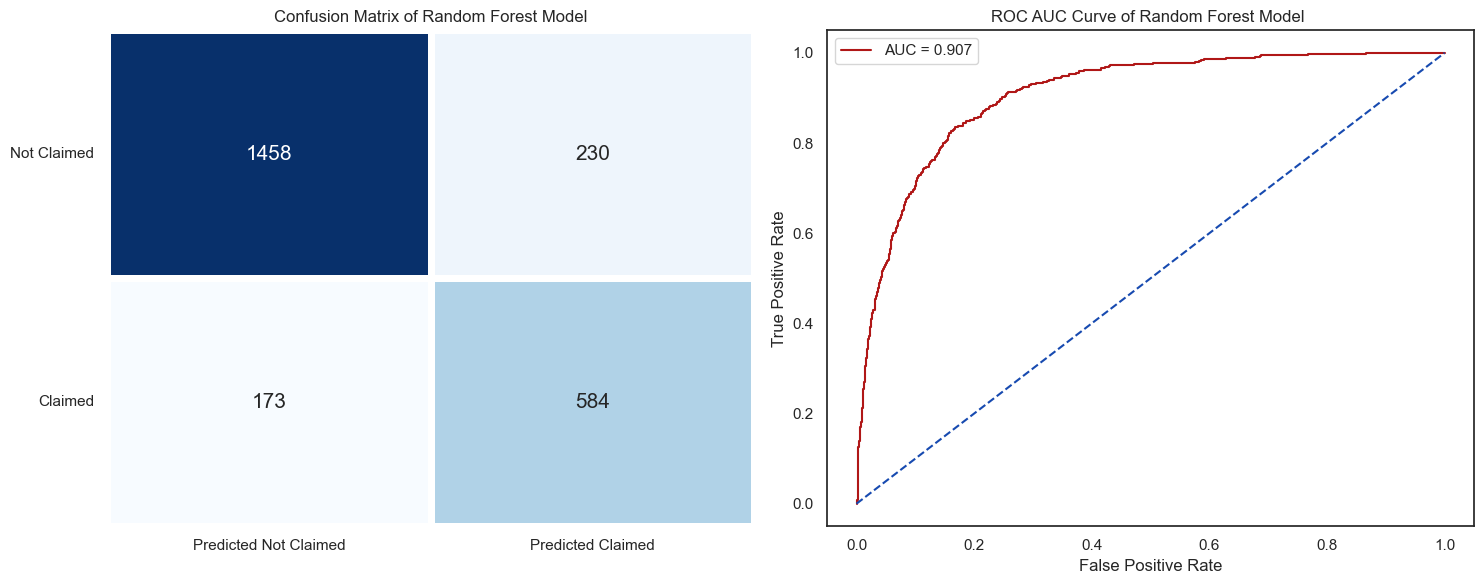

In [46]:
plt.figure(figsize = (15, 6))

# Visualizing Confusion Matrix
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix of Random Forest Model')
sns.heatmap(rfc_cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not Claimed', 'Claimed'], xticklabels = ['Predicted Not Claimed', 'Predicted Claimed'])
plt.yticks(rotation = 0)

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rfc_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.subplot(1, 2, 2)
sns.set_theme(style = 'white')
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve of Random Forest Model ')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
# Get feature importances as a NumPy array
importances = rfc.feature_importances_


# Get column names from your DataFrame
columns = X.columns

# Create a DataFrame with feature importances and column names
feature_importances_df = pd.DataFrame({'Feature': columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Choose the top N features (e.g., top 10)
top_n_features = feature_importances_df.head(10)


print(top_n_features)

                      Feature  Importance
0                CREDIT_SCORE    0.112940
6         SPEEDING_VIOLATIONS    0.112685
1           VEHICLE_OWNERSHIP    0.104568
8              PAST_ACCIDENTS    0.097635
22   VEHICLE_YEAR_before 2015    0.074813
5              ANNUAL_MILEAGE    0.064481
15  DRIVING_EXPERIENCE_20-29y    0.056996
14  DRIVING_EXPERIENCE_10-19y    0.056063
4                 POSTAL_CODE    0.050878
20         INCOME_upper class    0.040097


### SVM

In [48]:
# Create a SVM model
svm = SVC(probability=True)

In [ ]:
# Test best hyperparameters for SVM model.
param_grid = {
    'C': [0.1, 1, 10, 100],    # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient for 'rbf'
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Perform grid search on the training data
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters found
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

In [49]:
# Update the SVM model
svm = SVC(C= 10, kernel= 'rbf', gamma= 0.01, random_state= 0, probability=True, class_weight='balanced')

In [50]:
# Fit the model on the training data
svm.fit(X_train, y_train)

# Make predictions on the test data
svm_y_pred = svm.predict(X_test)
svm_y_prob =svm.predict_proba(X_test)[:,1]
svm_cm = confusion_matrix(y_test,svm_y_pred)

In [51]:
# Evaluate by Metrics
svm_ac = accuracy_score(y_test, svm_y_pred)
svm_rocauc= roc_auc_score(y_test, svm_y_prob)

In [52]:
# Evaluate by Metrics
print(classification_report(y_test, svm_y_pred))
print(f'ROC AUC score: {svm_ac}')
print('Accuracy Score: ',svm_rocauc)

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      1688
         1.0       0.68      0.85      0.76       757

    accuracy                           0.83      2445
   macro avg       0.80      0.84      0.81      2445
weighted avg       0.85      0.83      0.83      2445

ROC AUC score: 0.8290388548057259
Accuracy Score:  0.9022558803458403


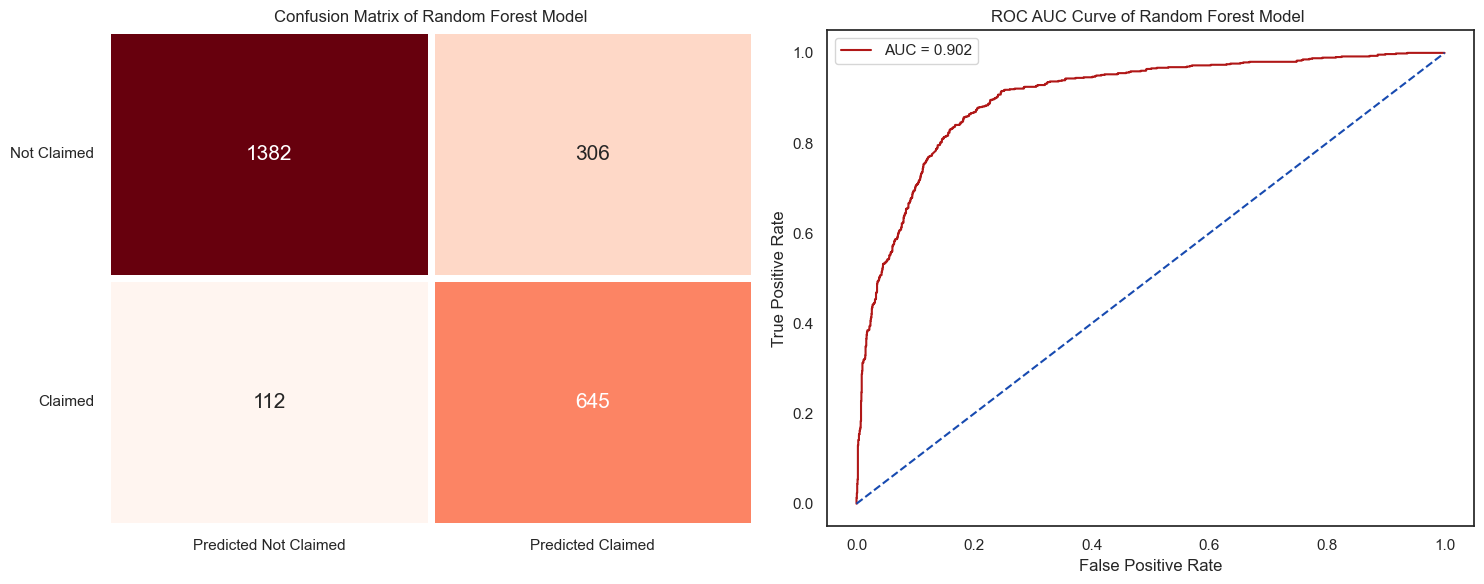

In [53]:
plt.figure(figsize = (15, 6))

# Visualizing Confusion Matrix
plt.subplot(1, 2, 1)
plt.title('Confusion Matrix of Random Forest Model')
sns.heatmap(svm_cm, cmap = 'Reds', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Not Claimed', 'Claimed'], xticklabels = ['Predicted Not Claimed', 'Predicted Claimed'])
plt.yticks(rotation = 0)

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, svm_y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.subplot(1, 2, 2)
sns.set_theme(style = 'white')
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve of Random Forest Model ')
plt.legend()

plt.tight_layout()
plt.show()

In [54]:
# Model Comparsion
models = pd.DataFrame({
    'Model' : ['Logistic Model','Desion Tree Model', 'Random Forest Model','SVM Model'],
    'Accuracy Score' : [lr_ac, dtc_ac, rfc_ac, svm_ac],
    'ROC AUC score' : [lr_rocauc, dtc_rocauc, rfc_rocauc, svm_rocauc]
})


models.sort_values(by = ['Accuracy Score'], ascending=[False])

,Model,Accuracy Score,ROC AUC score
2,Random Forest Model,0.835174,0.906785
3,SVM Model,0.829039,0.902256
0,Logistic Model,0.820041,0.902736
1,Desion Tree Model,0.819632,0.888346
